In [1]:
import os
import sys

sys.path.append('..')

In [2]:
import torch
import numpy as np
from matplotlib import pyplot as plt
from utilities import overlap_top_tr, get_hessian_eigenvalues

In [6]:
evec_history = os.path.join("..", "..", "storage", "evec_history")

In [10]:
def plot_overlap(data_dir):
  for i in range(5):
    overlaps = []
    first_top_space = torch.load(os.path.join(data_dir, f"eivs-{i}-before-training.pt"), weights_only=True)
    second_top_space = torch.load(os.path.join(data_dir, f"eivs-{i}-after-training-{i}.pt"), weights_only=True)
    overlap = overlap_top_tr(first_top_space, second_top_space)
    overlaps.append(overlap)
    for j in range(5):
      
      first_top_space = torch.load(os.path.join(data_dir, f"eivs-{i}-after-training-{j}.pt"), weights_only=True)
      second_top_space = torch.load(os.path.join(data_dir, f"eivs-{i}-after-training-{i}.pt"), weights_only=True)
      overlap = overlap_top_tr(first_top_space, second_top_space)
      overlaps.append(overlap)
    plt.plot(range(6), overlaps, "x-", label=f"Hessian of experience {i}")
  plt.xlabel("Number of trained expiriences")
  plt.ylabel("Overlap")
  plt.legend()


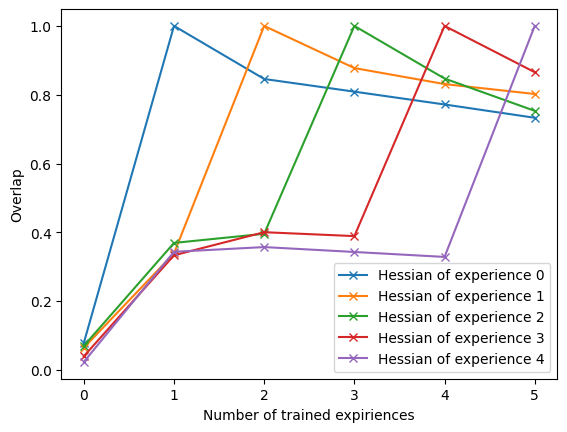

In [11]:
plot_overlap(os.path.join(evec_history, "only_first"))

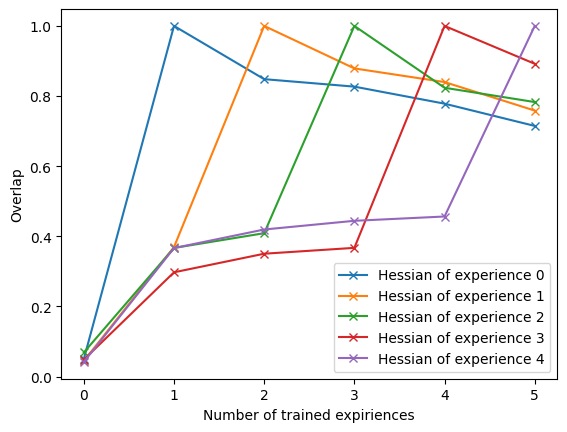

In [13]:
plot_overlap(os.path.join(evec_history, "gs_no_distance_penalty"))

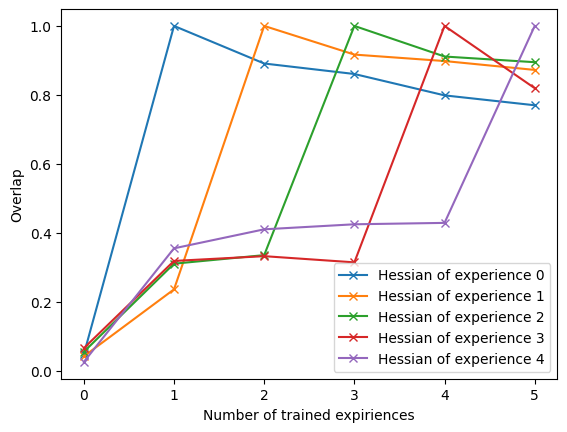

In [14]:
plot_overlap(os.path.join(evec_history, "ewc"))

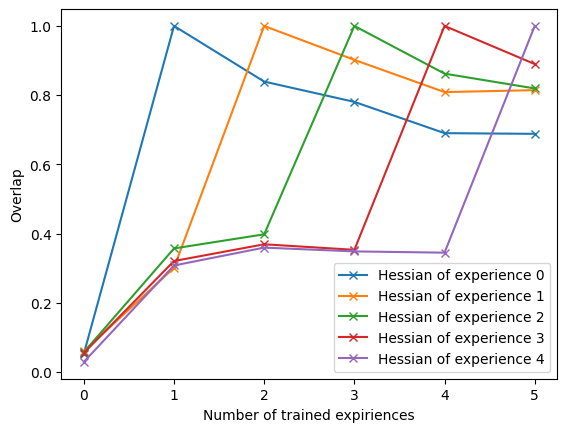

In [15]:
plot_overlap(os.path.join(evec_history, "naive"))

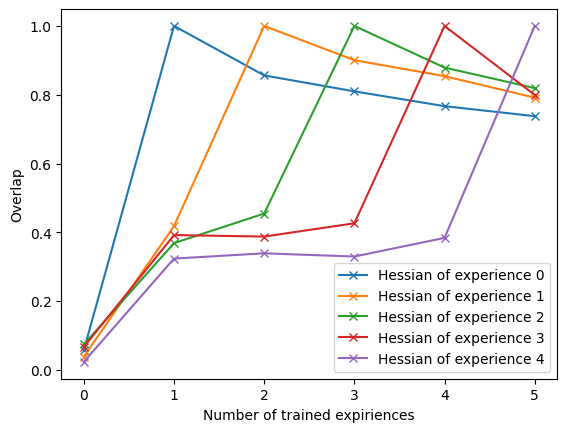

In [61]:
plot_overlap(os.path.join(evec_history, "gs_distance_penalty"))

In [64]:
def calculate_mean_overlap_with_last(data_dir):
    overlap_sum = 0
    overlap_num = 0
    for i in range(4):
        first_top_space = torch.load(os.path.join(data_dir, f"eivs-{i}-after-training-{4}.pt"), weights_only=True)
        second_top_space = torch.load(os.path.join(data_dir, f"eivs-{i}-after-training-{i}.pt"), weights_only=True)
        overlap = overlap_top_tr(first_top_space, second_top_space)
        overlap_sum += float(overlap)
        overlap_num += 1
    return overlap_sum / overlap_num

def calculate_mean_overlap_with_next(data_dir):
    overlap_sum = 0
    overlap_num = 0
    for i in range(4):
        first_top_space = torch.load(os.path.join(data_dir, f"eivs-{i}-after-training-{i + 1}.pt"), weights_only=True)
        second_top_space = torch.load(os.path.join(data_dir, f"eivs-{i}-after-training-{i}.pt"), weights_only=True)
        overlap = overlap_top_tr(first_top_space, second_top_space)
        overlap_sum += float(overlap)
        overlap_num += 1
    return overlap_sum / overlap_num

def calculate_mean_overlap_first_expirience(data_dir):
    overlap_sum = 0
    overlap_num = 0
    for i in range(1, 5):
        first_top_space = torch.load(os.path.join(data_dir, f"eivs-{0}-after-training-{0}.pt"), weights_only=True)
        second_top_space = torch.load(os.path.join(data_dir, f"eivs-{0}-after-training-{i}.pt"), weights_only=True)
        overlap = overlap_top_tr(first_top_space, second_top_space)
        overlap_sum += float(overlap)
        overlap_num += 1
    return overlap_sum / overlap_num

In [65]:
experiments_list = ["ewc", "naive", "only_first", "gs_no_distance_penalty"]
experiments_names = ["ewc", "naive", "BSGP-OF", "BSGP-GS (no regularization)"]

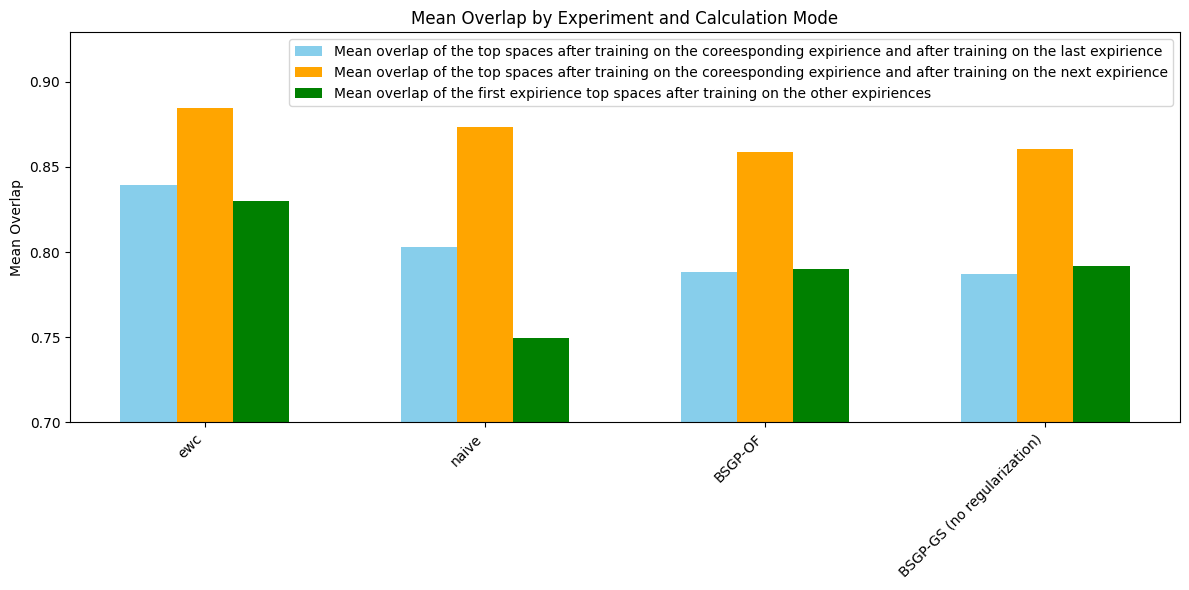

In [70]:
# Create the histogram plot
experiment_mean_overlap_with_last = {}
experiment_mean_overlap_with_next = {}
experimet_mean_overlap_first_expirience = {}
for experiment in experiments_list:
    experiment_mean_overlap_with_last[experiment] = calculate_mean_overlap_with_last(os.path.join(evec_history, experiment))
    experiment_mean_overlap_with_next[experiment] = calculate_mean_overlap_with_next(os.path.join(evec_history, experiment))
    experimet_mean_overlap_first_expirience[experiment] = calculate_mean_overlap_first_expirience(os.path.join(evec_history, experiment))

# Prepare data for plotting
overlap_with_last = list(experiment_mean_overlap_with_last.values())
overlap_with_next = list(experiment_mean_overlap_with_next.values())
overlap_of_first = list(experimet_mean_overlap_first_expirience.values())

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 6))

# Set the width of each bar and the positions of the bars
width = 0.2
x = np.arange(len(experiments_names))

# Create the bars
rects1 = ax.bar(x - width, overlap_with_last, width, label='Mean overlap of the top spaces after training on the coreesponding expirience and after training on the last expirience', color='skyblue')
rects2 = ax.bar(x, overlap_with_next, width, label='Mean overlap of the top spaces after training on the coreesponding expirience and after training on the next expirience', color='orange')
rects3 = ax.bar(x + width, overlap_of_first, width, label='Mean overlap of the first expirience top spaces after training on the other expiriences', color='green')

# Customize the plot
ax.set_ylabel('Mean Overlap')
ax.set_title('Mean Overlap by Experiment and Calculation Mode')
ax.set_xticks(x)
ax.set_xticklabels(experiments_names, rotation=45, ha='right')
ax.legend()

# Set y-axis to start from 0.7
ax.set_ylim(bottom=0.7)

# Add some padding to the bottom of the plot to prevent cutting off x-labels
plt.tight_layout()

# Show the plot
plt.show()
